# **<center>Cost-effectiveness analysis of pool testing for COVID19</center>**
**<center> Sijing Yu <br> </center>**
<center> Department of Mathematics <br>
University of Maryland </center>




#### **1. Introduction**
Covid-19 is an infectious respiratory disease caused by the coronavirus, SARS-CoV-2. It spreads through the air and has caused an ongoing global pandemic after first outbreak in Wuhan, China. It has so far infected more than 40 million people worldwide with over 1 million deaths [1]. <br> <br> 
Among all the procedures of preventing the spreading, testing is of prominent importance to first identify the infection. The majority of Covid-19 tests falls into two categories: diagnostic tests for current infection and antibody test for past infection [2]. In this analysis, we consider a widely used diagnostic test: "gold standard" RT-PCR test which costs \$125 and takes 4-6 hours processing time and a turnaround of 2-4 days [3]. <br><br> 
In order to test more efficiently, one strategy used is pool testing, which is dependent on the same polymerase chain reaction (PCR) technonoly such as RT-PCR mentioned above. It combines samples and tests them in a single test and only retests samples with virus present, so the required supplies and time for tests can be greatly reduced [4].<br> <br> 
In this analysis, we analyze the efficiency and limitations of current pool testing strategies and examine both the costs and test outcomes of these stratgies. For the purpose of clarity, following variables will be used in the analysis: <br> <br>
$P_t$: prevalence rate, the probability that a random selection represents an infected sample in a perfectly accurate test; <br>
$S_e$: sentivity $ = \frac{\textrm{True positives}}{\textrm{True positives + False negatives}}$ <br>
$S_p$: specificity $ =\frac{\textrm{True negatives}}{\textrm{True negatives + False positives}}$ <br>
$P_n$: the probablity of containing at least 1 sample tested positive in n patients: $P_n = S_e \cdot (1 - (1 - p)^n) + (1 - S_p)(1 - p)^n$ <br>
$n$: total population for tests; <br>
$n'$: popultation that requires retest from groups tested positive; <br>
$k$: size of each group $n$ samples are split into;<br>
$k'$: subgroup size (Three-Stage Testing) <br>



#### **2. Pool Testing Strategies** <br>
##### **2.1 Dorfman Testing** <br>
For the collected $n$ samples split into $\frac{n}{k}$ groups, each group will be tested once at the same time. Groups with negative results will be ruled out, and groups with positive results will be retested individually for each sample. During the process, with prevalence rate $p$, $1 - (1-p)^k$ is the probablity of a random selection of group of size $k$ contains at least one infected sample in a perfect test, and $P_n = S_e \cdot (1 - (1 - p)^n) + (1 - S_p)(1 - p)^n$ is the actual probablity of containing at least 1 sample tested positive in n patients.

In [ ]:
# perfectly accurate test
def InfectedGroupProb(p, k):
    return 1 - (1 - p)**k

# se -- sensitivity, sp -- specificity, both will be 100% in a perfect test
def P_k(p, se, sp, k):
    return se*(1 - (1 - p)**k) + (1 - sp)*(1 - p)**k

The expected number of tests required by the procedure is $\frac{n}{k} + \frac{n}{k} \cdot P_k \cdot k = \frac{n}{s} + n \cdot P_k$

In [ ]:
# n -- population for testing
# k -- group size 
def DorfmanExpectedTests(n, p, se, sp, k):
    return n/k + n*P_k(p, se, sp, k); 

Therefore, the ratio of number of group tests needed for Dorfman testing to the number of individual tests needed is as following.

In [ ]:
# n -- number of tests neede for invidual testing
def DorfmanRatio(n, p, se, sp, k):
    return DorfmanExpectedTests(n, p, se, sp, k)/n;

##### **2.2 Three-Stage Testing** <br>
Three-Stage testing is similar to Dorfman
testing except for that groups tested positive are divided further into
subgroups for retests. Then for any subgroup tested positive, each sample in it will be tested individually [6]. It is clear that the procedure after first group test is the same as Dorfman testing for each subgroup, and it take $\frac{n}{k}$ tests for the first round. Therefore, the expected number of tests required for three-stage testing is $\frac{n}{k} + \frac{n'}{k'} + n'P_{k'}$ with $n'$ as the population of groups tested positive and $k'$ as the subgroup size.

In [ ]:
# k2 -- subgroup size <= k/2
def ThreeStageExpectedTests(n, p, se, sp, k, k2):
    return n/k + DorfmanExpectedTests(n*P_k(p, se, sp, k), p, se, sp, k2)

Therefore, the ratio of number of group tests needed for three-stage testing to the number of individual tests needed is as following.

In [ ]:
def ThreeStageRatio(n, p, se, sp, k, k2): 
    return ThreeStageExpectedTests(n, p, se, sp, k, k2)/n

##### **2.3 Array Testing** <br>
Array Testing is an improvement on Dorfman's testing: the first round of group tests is the same, but then the array testing divides samples tested positive into overlapping subgroups. These samples from the first round are arranged into matrix or higher dimension structure which allows greater group sizes. Then the positive samples can be identified by being the intersection of two groups tested positive. For example, for a $3\cdot3$ matrix, any positive sample can be identified by being both in a positive row and a positive column after $3 + 3 = 6$ tests for each row and column. [7] For the purpose of this analysis, 2 dimension matrix will be considered and examined for array testing. <br>
As a consequence, the expected number of tests will be the number of the first round Dorfman's tests plus the sum of number of rows and columns in the second round. To minimize the number of tests in the second round (proof [8]), we take the floor of the square root of the sample size $n'$: $\lfloor \sqrt{n'} \rfloor$ itself or $\lfloor \sqrt{n'} \rfloor$ & $\lfloor \sqrt{n'} \rfloor + 1$ if $n'$ is not a perfect square  as number of rows and columns. Therefore, the expected number of tests is $\frac{n}{k} + 2 \cdot \lfloor \sqrt{n'} \rfloor$ or $\frac{n}{k} + 2 \cdot \lfloor \sqrt{n'} \rfloor + 1$ if $n'$ is not a perfect square. Since for natural numbers within a bounded interval, there are less perfect squares than other numbers (proof [9]), $\frac{n}{k} + 2 \cdot \lfloor \sqrt{n'} \rfloor + 1$ will be used.


In [ ]:
import numpy as np
def ArrayExpectedTests(n, p, se, sp, k):
    # n2 = n' -- number of samples for retests
    n2 = n*P_k(p, se, sp, k)
    return n/k + 2*np.floor(np.real(np.sqrt(n2))) + 1

Therefore, the ratio of number of group tests needed for array testing to the number of individual tests needed is as following.

In [ ]:
def ArrayRatio(n, p, se, sp, k): 
    return ArrayExpectedTests(n, p, se, sp, k)/n

#### **3. Preliminary Efficiency Analysis**<br><br> 
##### **3.1 Optimal Group Size** <br>
In order to achieve the greatest efficiency, optimal group size for pool testing is proposed by Bertolotti et al. [10] that the optimal group size <br> k is given by <center><font size="5"> **$k = \frac{2 W(-\frac{1}{2} \sqrt{-
\ln(1-p)})}{\ln(1-p)}$**</font></center> $W(x)$: the Lambert $W$ function.


In [ ]:
def optimal_groupSize(p):
    insideW = np.real(-0.5*np.real(np.sqrt(-np.log(1-p))))
    return 2*lambertw(insideW)/np.log(1-p)

##### **3.2 Testing Efficiencies with Perfect Accuracy** <br>
When the tests are perfectly accurate, the sensivity and specificity will both be 1, and the following shows the performance of each testing in the perfect case. We can see that while the Three Stage testing increases the efficiency of the original Dorfman testing, the Array testing algorithm outperforms Three Stage testing decently. 



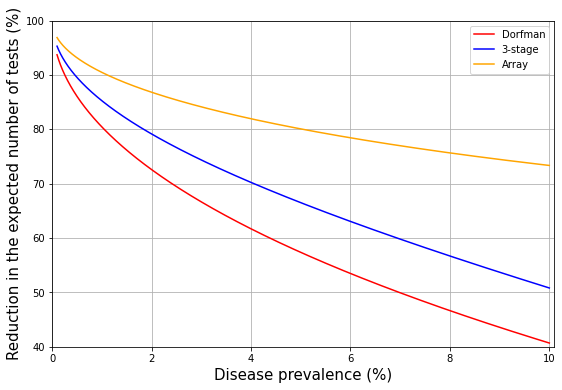

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import lambertw
import warnings
warnings.filterwarnings("ignore")
# prevalence
x = np.arange(0.001, 0.1, 0.0000001, dtype=np.float64)
n = 10**9
fig, host = plt.subplots(figsize=(9,6))
plt.xlabel('Disease prevalence (%)', size = 15)
plt.ylabel('Reduction in the expected number of tests (%)',size = 15)
host.plot(x*100, (1 - DorfmanRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color = "red", label = 'Dorfman')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 2))*100, color='blue', label = '3-stage')
host.plot(x*100,  (1 - ArrayRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color='Orange', label = 'Array')
host.grid()
host.set_ylim(40,100)
host.set_xlim(0,10.1)
host.legend()

##### **3.3 Testing Efficiencies with Different Accuracy Levels** <br>
In real-world applications, the sensitivity and specificity are rarely perfect. With different levels of accuracy, the efficiency of the tests will be reduced correspondingly. For the following graph, the tests have a sensitivity of 80% and a specificity of 90%. However, the graph does not represent the real efficiency of these tests with imperfect accuracies since "efficiency" refers to number of tests reduced to finish testing, but does not guarantee desired accuracy.

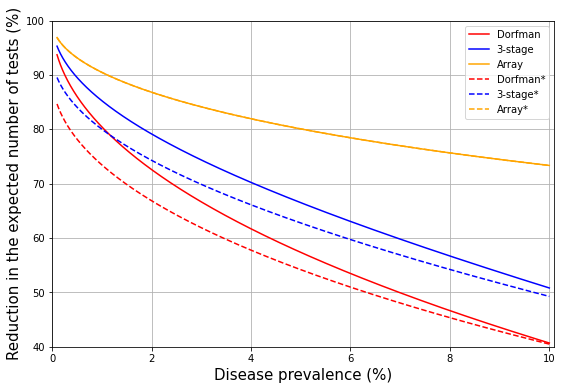

In [ ]:
fig, host = plt.subplots(figsize=(9,6))
plt.xlabel('Disease prevalence (%)', size = 15)
plt.ylabel('Reduction in the expected number of tests (%)',size = 15)
host.plot(x*100, (1 - DorfmanRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color = "red", label = 'Dorfman')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 1, 1, optimal_groupSize(x), 2))*100, color='blue', label = '3-stage')
host.plot(x*100,  (1 - ArrayRatio(n, x, 1, 1, optimal_groupSize(x)))*100, color='Orange', label = 'Array')
host.plot(x*100, (1 - DorfmanRatio(n, x, 0.8, 0.9, optimal_groupSize(x)))*100, '--', color = "red", label = 'Dorfman*')
host.plot(x*100,  (1 - ThreeStageRatio(n, x, 0.8, 0.9, optimal_groupSize(x), 2))*100, '--', color='blue', label = '3-stage*')
host.plot(x*100,  (1 - ArrayRatio(n, x, 0.8, 0.9, optimal_groupSize(x)))*100, '--', color='Orange', label = 'Array*')
host.grid()
host.set_ylim(40,100)
host.set_xlim(0,10.1)
host.legend()

[1] https://www.bbc.com/news/world-51235105 <br>
[2] https://www.fda.gov/consumers/consumer-updates/coronavirus-testing-basics <br>
[3] Ramdas, K., Darzi, A. & Jain, S. ‘Test, re-test, re-test’: using inaccurate tests to greatly increase the accuracy of COVID-19 testing. Nat Med 26, 810–811 (2020). https://doi.org/10.1038/s41591-020-0891-7 <br>
[4] https://www.washingtonpost.com/health/what-is-pool-testing-and-how-does-it-work/2020/06/26/33eee7ea-b7e4-11ea-a510-55bf26485c93_story.html
<br>[5] https://projecteuclid.org/download/pdf_1/euclid.aoms/1177731363
<br>[6] https://rss.onlinelibrary.wiley.com/doi/full/10.1111/1740-9713.01399
<br>[7] https://www.nature.com/articles/d41586-020-02053-6
<br>[8] Proof of minimal number
<br>[9] Proof there're less perfect squares than other numbers within a bounded interval of natural numbers
<br>[10] https://idss.mit.edu/wp-content/uploads/2020/04/04.28.2020pooled_testing.pdf